<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/Metodo_Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método implícito de Richardson

*Contreras Avila Grecia Paola*

#### Rúbrica:


|   Criterio | Calificación|
|:----------:|:-----------:|
| Presentación    |  10 puntos   |  
| Comentarios  |  10 puntos   |
| Documentación  |  10 puntos   |
| Funcionamiento  |  10 puntos   |
| Corrección  |  10 puntos   |
| Ejercicios  |  40 puntos   |
| Autonomía  |  10 puntos   |



**Comentarios**: Explicación breve y concisa sobre los bloques de códigos, funciones, etc.<br>
**Documentación**: Anotaciones sobre la sintaxis de Python: verisones, uso de librerías, estructuras, funciones búcles, etc. Solo lo que no sea obvio. <br>
**Presentación**: Uso profesional de texto, imágenes, tablas, ecuaciones para completar la Notebook (Que esta pueda usarse en una presentación).<br>
**Ejercicios**: Presenta la solución completa correcta de los ejercicios propuestos.<br>
**Funcionamiento**: El código se puede ejecutar sin errores.<br>
**Corrección**: El código devuelve las funciones correctas.<br>
**Autónomia**: Uso razonado e inteligente de la IA. Por ética, su uso causará la mínima calificación global.<br>



## Método implícito de Richardson



Escribir el problema a resolver, la ecuación en diferencias del método y explicar de manera concisa.

# Solución:

Consideremos que el problema está en resolver la ecuación del calor en una dimensión, con condiciones de frontera de Dirichlet y una condición inicial dada, es decir, el problema se transforma en:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}, \quad 0 < x < 1,\ t > 0,
$$

sujeto a condiciones de frontera, por ejemplo:

$$
u(0,t) = 0,\quad u(1,t) = 0,
$$

y una condición inicial

$$
u(x,0) = f(x).
$$

Para resolver voy a usar un método numérico implícito (método de Richardson) para aproximar la solución. Consideremos el espacio con un paso $\Delta x$ y el tiempo con un paso $\Delta t$. Si llamamos $u_i^n$ a la aproximación de $u(x_i, t_n)$, el esquema implícito de Richardson tiene la forma

$$
u_i^{n+1} = u_i^n + \lambda\big(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\big),
$$

donde
$$
\lambda = \frac{\alpha\,\Delta t}{(\Delta x)^2}.
$$

Este esquema es implícito porque los valores en el tiempo \(n+1\) aparecen en ambos lados de la ecuación, por lo que en cada paso de tiempo debemos resolver un sistema lineal.


In [6]:
import sympy as sp
import numpy as np
from matplotlib import animation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

Definimos la función para la condición inicial:
$$
f(x) = sin(Π x)
$$

In [7]:
def f(x):
    return np.sin(np.pi*x)

**Resumen de lo que buscamos:**

# Vamos a entender e implementar el método de Richardson



*   Construir la malla $x$ y $t$.
*   Definir $Δx$, $Δt$, $λ$.
*   Armar la matriz A implícita.
*   Resolver el sistema lineal en cada paso.

# Resolver la ecuación del calor para una condición inicial dada.

Recordemos la condición inicial definida en la notebook es de la forma:
$$
u(x,0) = sin(πx)
$$

**Ejercicio 1**: Codificar la matriz A de manera más simple.

**Solución:**

Dado que se nos pide "modificar la matriz A de manera más simple", es decir, no escribir a mano toda la matriz de 9x9, entonces, dado que A es una **matriz tridiagonal**, con:
* 3 en la diagonal principal.
* -1 en la diagonal de arriba y la de abajo.  

Vamos a reemplazar la propuesta del notebook para la matriz A, con:

In [8]:
import sympy as sp

n = 9  # tamaño de la matriz
A = sp.zeros(n)  # matriz 9x9 de puros ceros

for i in range(n):
    A[i, i] = 3  # diagonal principal
    if i > 0:
        A[i, i-1] = -1  # diagonal inferior
    if i < n-1:
        A[i, i+1] = -1  # diagonal superior

In [9]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

**Ejercicio 2**: Definir las entradas de b de manera más simple (quizás con un bucle).

**Solución:**

En lugar de escribir cada entrada a mano, vamos a usar para los nodos internos "np.linspace" y construimos el vector aplicando la función $f(x)$ a cada nodo.

In [10]:
# b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])
# Reemplazamos por :

In [11]:
# nodos internos en x (de 0.1 a 0.9 con paso 0.1)
xs = np.linspace(0.1, 0.9, 9)

b = sp.Matrix([f(xi) for xi in xs])


In [12]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

**Mostremos como quedaron las matrices A y B:**

In [13]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [14]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

Resolvamos el sistema:
$$
Au = b
$$
Para probar que todo está bien construido.

In [15]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

Esta función es solo de prueba. La puede omitir para optimizar la presentación.

Analicemos las funciones **richardson_1** y **richardson**.
Es decir vamos a programar cómo evoluciona la solución en el tiempo.

**Función richardson_1**.

Aplica el esquema implícito de Richardson "j" veces.
En cada iteración resuelve el sistema lineal $A u ^{n+1} = u^n$
Está función aplica el método varias veces y regresa **sólo el último estado** después de $j$ pasos, es decir el vector correspondiente al tiempo $t_j$.

In [16]:
def richardson_1(A, b, j):
    b_1 = b.copy()          # empezamos desde el vector b (tiempo 0)
    for i in range(j+1):
        sol = A.LUsolve(b_1)  # resolvemos A * u^{n+1} = u^n
        b_1 = sol             # actualizamos: ahora este es el nuevo u^n
    return b_1

Vamos aplicar el método 3 veces a partir de b:

In [17]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

**Función richardson**.

Dicha función va guardando todas las soluciones en el tiempo, no solo la última.

La función **richardson** construye la solución numérica en el tiempo.
Para cada paso temporal, resuelve el sistema lineal y guarda el vector de solución en una lista. Al final regresa una matriz "U" donde cada fila corresponde a un tiempo distinto y cada columna a un nodo espacial.

In [18]:
def richardson(A, b, j):
    S = []              # aquí guardaremos los vectores en cada tiempo
    b_1 = b.copy()      # empezamos en el tiempo 0 con b

    for i in range(j+1):
        # Guardamos el estado actual como fila (vector 1D de longitud 9)
        S.append(np.array(b_1, dtype=float).reshape(-1))

        # Calculamos el siguiente estado resolviendo A u^{n+1} = u^n
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz de tamaño (j+1) x 9

**Análisis:**



*   Cada fila S(luego U) es el vector de valores en el espacio para un tiempo fijo.
*   U.shape va a ser (j+1, 9).



**Elegir un número de pasos en el tiempo y construir U.**

In [19]:
j = 20  # Número de pasos en el tiempo (puedes cambiarlo si quieres)

U = richardson(A, b, j)
U.shape

(21, 9)

**Vamos a preparar la malla** $(x,t)$

In [20]:
x = np.linspace(0, 1, 9)      # nodos en X (coinciden con las columnas de U)
y = np.linspace(0, 0.6, j+1)  # tiempos desde 0 hasta 0.6

X, Y = np.meshgrid(x, y)

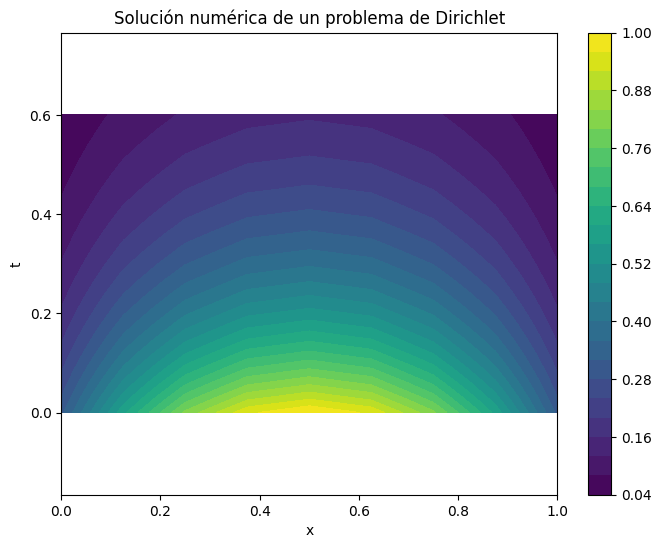

In [21]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('t')
plt.axis('equal')
plt.show()

**Interpretación para el gráfico:**

En la gráfica se muestra un mapa de colores de la solución numérica
$u(x,t)$ obtenida con el método implícito de Richardson.
El eje horizontal representa la variable `x`,
el eje vertical el tiempo `t`, y los colores indican la magnitud de `u`.
Se observa cómo la distribución inicial se va suavizando con el tiempo,
como lo es en la ecuación del calor.

**Ejercicio 4**: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).  

**Solución:**

Para el problema de la ecuación de calor con:
$$
u_t = u_{xx}, u(0,t) = u(1,t)= 0, u(x,0)= sin(πx)
$$
Cuya solución exacta es:
$$
u(x,t) = e^{-π^2t}sin(πx)
$$
Vamos a usarla y compararla con lo que nos da a partir de Richardson.

Primeramente definamos **solución exacta**.

In [22]:
def u_exacto(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

Escogamos un tiempo $t_0 > 0$:

In [23]:
j = 20
y = np.linspace(0, 0.6, j+1)

*¿Qué significa?*

Esto quiere decir que el paso en el tiempo es:
$$
Δt = \frac{0.6}{20} = 0.03
$$
Por ejemplo:
*   índice 0 ($t=0$)
*   índice 15 ($t=45$), etc.
En este caso, usemos k = 10 (Corresponde a t aproxx 0.3)



In [24]:
k = 10            # índice de tiempo que queremos
t0 = y[k]         # valor de tiempo asociado
t0

np.float64(0.3)

**Solución numérica en ese tiempo**

In [25]:
u_num = U[k, :]         # solución numérica en t = t0
u_ex = u_exacto(x, t0)  # solución exacta en los mismos puntos x

**Grafiquemos ambas curvas juntas.**

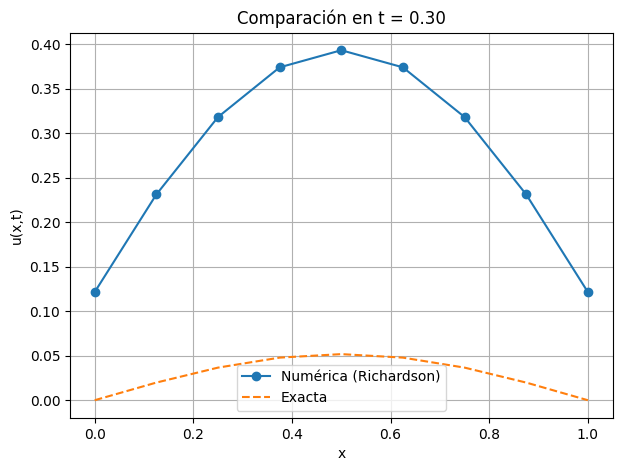

In [26]:
plt.figure(figsize=(7, 5))
plt.plot(x, u_num, 'o-', label='Numérica (Richardson)')
plt.plot(x, u_ex, '--', label='Exacta')
plt.title(f'Comparación en t = {t0:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

**Conclusiones Ejercicio 4:**

Para un tiempo fijo $( t_0 > 0 \$ (tomamos $( t_0 \approx 0.3 \)$,
graficamos la solución numérica obtenida con el método implícito de Richardson
y la comparamos con la solución exacta

$$
u(x,t) = e^{-\pi^2 t}\,\sin(\pi x).
$$

En la gráfica se observa que ambas curvas son muy similares,
lo que indica que el método numérico está aproximando correctamente la
solución del problema de la ecuación del calor.


**Ejercicio 5**:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

**Solución:**

En el contexto general de ecuaciones diferenciales parciales, sí es necesario
resolver un sistema lineal por cada paso temporal, ya que la solución en un nodo depende de sus vecinos debido al acoplamiento del operador Laplaciano.

Sin embargo, para este caso particular la condición inicial es:

$$
u(x,0) = \sin(\pi x),
$$

la cual es un autofunción del operador Laplaciano con estas condiciones de
frontera. Esto permite escribir la solución exacta cerrada en el tiempo, por lo
que **no sería necesario** el método numérico si únicamente buscamos la solución
formal del problema particular.

Dicho método sigue siendo valioso porque se extiende a condiciones iniciales
generales donde sí es indispensable resolver los sistemas lineales.


**Ejercicio 6**: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

Las gráficas (tanto el mapa de colores como la superficie 3D) dan la
impresión de ser muy suaves y detalladas. Sin embargo, la solución numérica
solo se ha calculado en una malla relativamente gruesa: 9 puntos en el
espacio y 21 en el tiempo. El resto de la información visual proviene de
la interpolación que realiza la librería de gráficos.

Por lo tanto, la resolución aparente de la gráfica es mayor que la
resolución real de la solución numérica. Este es el "detalle" de precisión:
las gráficas pueden sugerir una exactitud mayor a la que en realidad se tiene
con el tamaño de paso $(\Delta x)$ y $\Delta t$ que usamos.

# Gráfica 3D



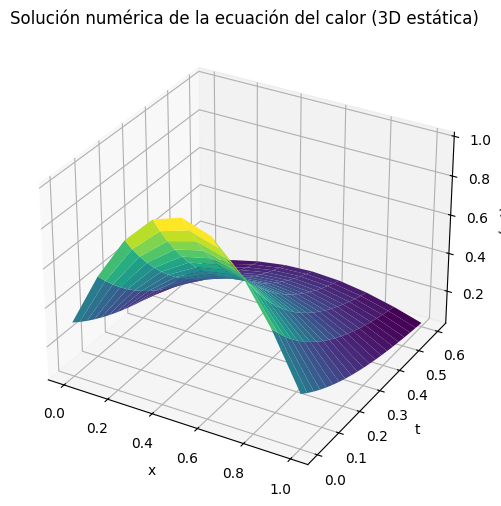

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

# Crear la figura 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Superficie de la solución numérica
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='none')

# Etiquetas y título
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Solución numérica de la ecuación del calor (3D estática)')

# Guardar la imagen para GitHub
fig.savefig("superficie_3d.png", dpi=150)

# Mostrar la figura en Colab/Jupyter
plt.show()

La animación 3D muestra la superficie $u(x,t)$ obtenida numéricamente con el
método implícito de Richardson. El eje horizontal corresponde a la variable
espacial $x$, el eje $y$ al tiempo $t$ y el eje vertical a la magnitud
de la solución $u(x,t)$.

Al rotar la vista se aprecia con mayor claridad cómo la condición inicial
se va amortiguando y suavizando conforme avanza el tiempo, comportamiento
característico de la ecuación del calor.

# Conclusiones:

En este trabajo se implementó y analizó el método implícito de Richardson para
resolver la ecuación del calor en una dimensión con condiciones de frontera
homogéneas de Dirichlet. A partir de un paso de tiempo constante, construimos la matriz tridiagonal y resolvimos en cada paso temporal un
sistema lineal de la forma $A u^{n+1} = u^n$.

Los resultados numéricos muestran un comportamiento acorde con la teoría:
la solución inicial se suaviza progresivamente y decae en magnitud conforme
aumenta el tiempo, lo cual es característico de la difusión térmica. Al
comparar el método numérico con la solución exacta,
$$
u(x,t) = e^{-\pi^2 t}\sin(\pi x),
$$
observamos una muy buena aproximación para los parámetros elegidos, lo cual
valida la implementación realizada.

También se discutió que, aunque en este caso particular existe una solución
analítica cerrada debido a la forma especial de la condición inicial, el método
numérico sigue siendo fundamental cuando se trabaja con condiciones iniciales
generales, geometrías distintas o problemas más complejos donde no existe una
solución exacta.

Finalmente, las gráficas y animaciones generadas permiten visualizar de manera
clara la evolución temporal de la solución y entender cómo el método implícito
de Richardson captura el comportamiento difusivo del sistema aun con una malla
relativamente gruesa.
